In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./trip.csv')

#데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [168]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [169]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [170]:
#중복 데이터 확인
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [171]:
data[data['passenger_name'] == 'Sarah Gross']
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [172]:
data = data.drop_duplicates()

data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [173]:
#결측치 확인
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [174]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [175]:
data = data.dropna()

data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [176]:
#passenger_count 컬럼의 이상치 제거
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<Axes: xlabel='None', ylabel='passenger_count'>

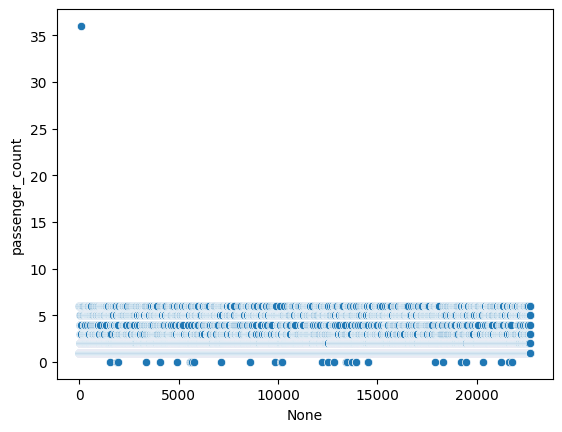

In [177]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [178]:
data = data[data['passenger_count'] <= 6]

data['passenger_count'].sort_values()

20312    0
17916    0
1876     0
10201    0
4921     0
        ..
14747    6
14745    6
10556    6
21945    6
0        6
Name: passenger_count, Length: 22695, dtype: int64

In [179]:
len(data[data['passenger_count'] == 0])

33

In [180]:
data = data[data['passenger_count'] != 0]

len(data[data['passenger_count'] == 0])

0

<Axes: xlabel='None', ylabel='passenger_count'>

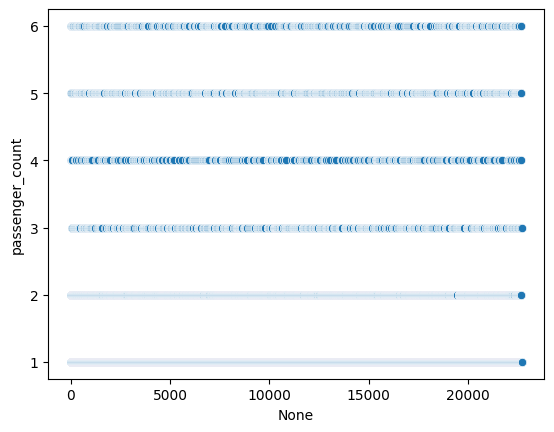

In [181]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [182]:
#수치형 컬럼의 이상치 제거
data["trip_distance"].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

In [183]:
data[data["trip_distance"] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [184]:
data = data[data["trip_distance"] > 0]

data[data["trip_distance"] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


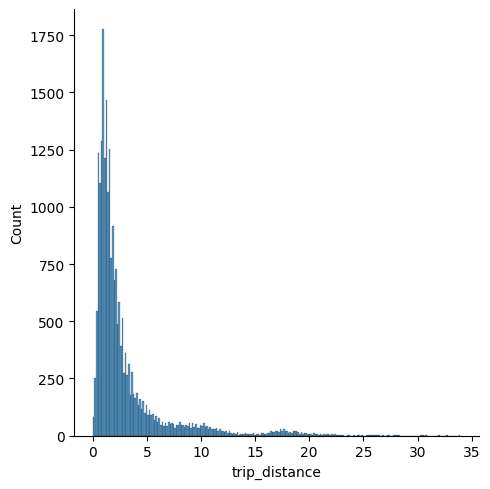

In [185]:
sns.displot(data["trip_distance"])

In [186]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [187]:
len(data[data['fare_amount'] <= 0])

16

In [188]:
data = data[data["fare_amount"] > 0]

len(data[data['fare_amount'] <= 0])

0

In [189]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.50,0.00,0.00
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


<Axes: xlabel='None', ylabel='fare_amount'>

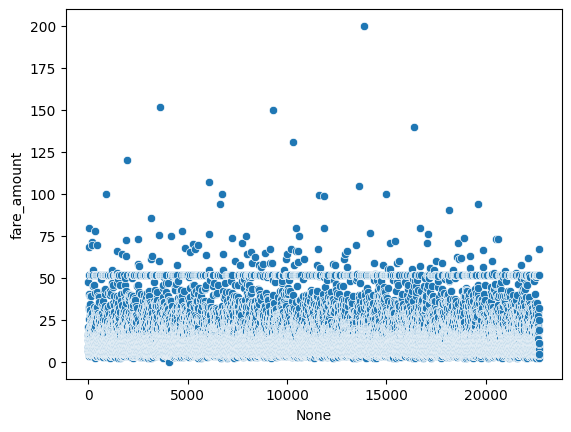

In [190]:
data = data.drop(8478)

sns.scatterplot(x = data.index, y = data["fare_amount"])

In [191]:
# def fare_func(x):
#     if x > 150:
#         return 150
#     else:
#         return x
    

# data['fare_amount'].apply(fare_func)

data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [192]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.00,0.00
19371,Amanda Taylor,03/24/2017 8:59:58 PM,03/24/2017 9:00:06 PM,Cash,1,0.02,2.50,7.00,0.00
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.00,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.00,51.64,5.76
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00


<Axes: xlabel='None', ylabel='tip_amount'>

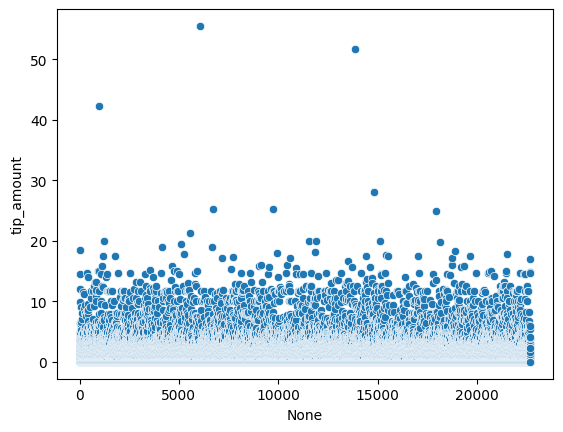

In [193]:
sns.scatterplot(x=data.index, y=data['tip_amount'])

In [194]:
data['tip_amount'].sort_values()

11357     0.00
11763     0.00
11765     0.00
11768     0.00
11777     0.00
         ...  
6710     25.20
14827    28.00
986      42.29
13863    51.64
6066     55.50
Name: tip_amount, Length: 22498, dtype: float64

In [195]:
data = data[data['tip_amount'] < 30]

len(data)

22495

<Axes: xlabel='None', ylabel='tolls_amount'>

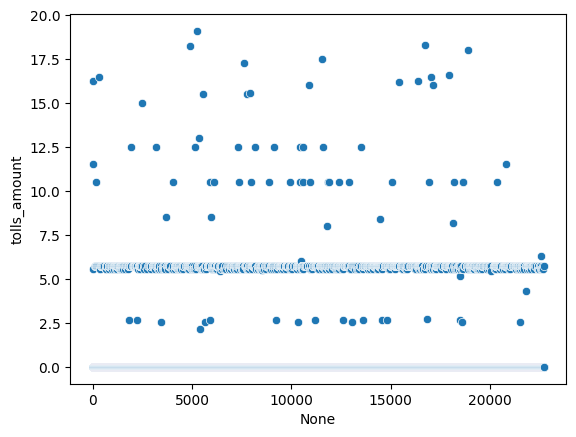

In [196]:
sns.scatterplot(x=data.index, y=data['tolls_amount'])

In [197]:
#범주형 데이터 전처리
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [198]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [199]:
data['payment_method'].nunique()

3

In [200]:
data['payment_method'].value_counts()

payment_method
Cash           11094
Debit Card      5729
Credit Card     5672
Name: count, dtype: int64

In [201]:
data['payment_method'] = data['payment_method'].replace({"Debit Card": "Card", "Credit Card": "Card"})

data['payment_method'].value_counts()

payment_method
Card    11401
Cash    11094
Name: count, dtype: int64

In [202]:
#승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.
data['passenger_name'] = data['passenger_name'].str.split(expand = True)[0]

data['passenger_name']

0          Pamela
1        Michelle
2            Tina
3         Anthony
4         Brianna
           ...   
22696      Austin
22697     Monique
22698        Drew
22699    Jonathan
22700    Benjamin
Name: passenger_name, Length: 22495, dtype: object

In [203]:
#택시 탑승, 하차 시간을 활용해봅시다.
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0
1,Michelle,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0
2,Tina,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0
3,Anthony,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22495 non-null  object 
 1   tpep_pickup_datetime   22495 non-null  object 
 2   tpep_dropoff_datetime  22495 non-null  object 
 3   payment_method         22495 non-null  object 
 4   passenger_count        22495 non-null  int64  
 5   trip_distance          22495 non-null  float64
 6   fare_amount            22495 non-null  float64
 7   tip_amount             22495 non-null  float64
 8   tolls_amount           22495 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [205]:
data['tpep_pickup_datetime'] = pd.to_datetime(data["tpep_pickup_datetime"])

In [206]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data["tpep_dropoff_datetime"])

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [208]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [209]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_time
0,Pamela,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04
1,Michelle,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30
2,Tina,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,0 days 00:07:12
3,Anthony,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,0 days 00:30:15
4,Brianna,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,0 days 00:16:43


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22495 non-null  object         
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns] 
 3   payment_method         22495 non-null  object         
 4   passenger_count        22495 non-null  int64          
 5   trip_distance          22495 non-null  float64        
 6   fare_amount            22495 non-null  float64        
 7   tip_amount             22495 non-null  float64        
 8   tolls_amount           22495 non-null  float64        
 9   travel_time            22495 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 1.9+ MB


In [211]:
data['travel_time'] = data['travel_time'].dt.seconds

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
 9   travel_time            22495 non-null  int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(2)
memory usage: 1.8+ MB


In [212]:
#보너스 (feature engineering 맛보기)


In [213]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_time
0,Pamela,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,844
1,Michelle,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,1590
2,Tina,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,432
3,Anthony,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,1815
4,Brianna,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,1003


In [214]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

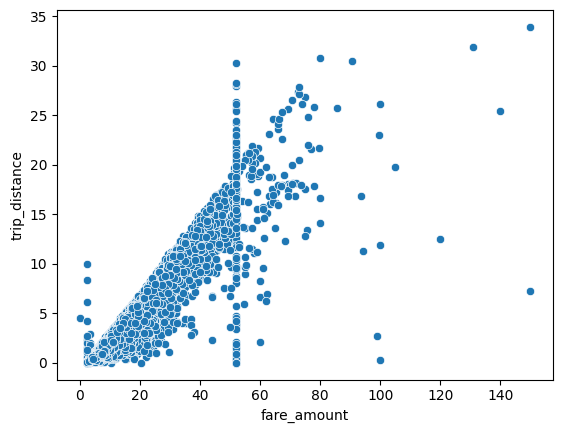

In [215]:
sns.scatterplot(x=data['fare_amount'], y=data['trip_distance'])

<Axes: xlabel='fare_amount', ylabel='travel_time'>

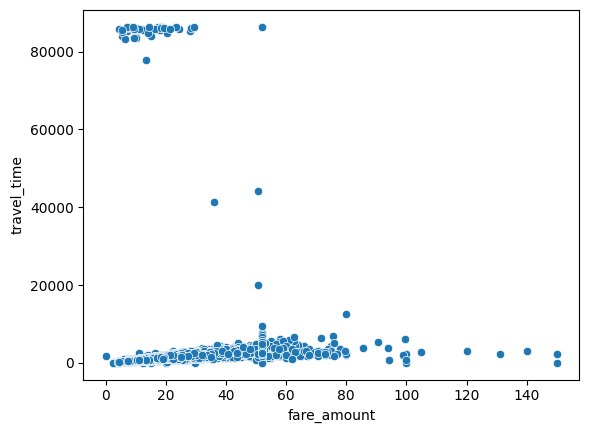

In [216]:
sns.scatterplot(x=data['fare_amount'], y=data['travel_time'])

<Axes: xlabel='trip_distance', ylabel='travel_time'>

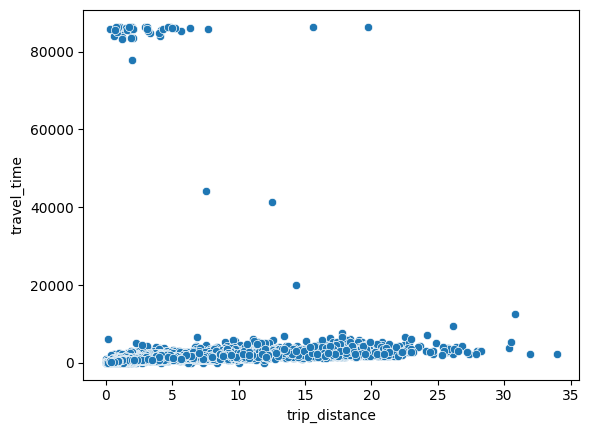

In [217]:
sns.scatterplot(x=data['trip_distance'], y=data['travel_time'])

In [218]:
data = data[data['travel_time'] <= 60000]